In [595]:
import andes
import os
import matplotlib.pyplot as plt
# import matplotlib 
%matplotlib inline
import numpy as np


# Load case

In [596]:
andes.config_logger(stream_level=20)

# case path
dir_path = os.path.abspath('..')
loc_path_case = '/Case_123bus/case123_REGCV1_v5.xlsx'

case = dir_path + loc_path_case

# load a case
ssa = andes.load(case,
                 setup=True,
                 no_output=True)

Working directory: "/home/buxin/andes/bshe/Case_123bus"
> Loaded config from file "/home/buxin/.andes/andes.rc"
> Reloaded generated Python code of module "pycode".
Parsing input file "/home/buxin/andes/bshe/Case_123bus/case123_REGCV1_v5.xlsx"...
Input file parsed in 0.0818 seconds.
System internal structure set up in 0.0238 seconds.


# Modify case

In [597]:
# reset REGCV1 control parameters
ssa.REGCV1.set(
                src='M', 
                idx= ssa.REGCV1.idx.v,
                attr='v',
                value= np.array([2, 2, 2, 2, 2, 2, 2, 2])/2
            )

ssa.REGCV1.set(
                src='D', 
                idx= ssa.REGCV1.idx.v, 
                attr='v',
                value= np.array([1, 1, 1, 1, 1, 1, 1, 1])
            )

True

In [598]:
# reset power setting point
ssa.PV.set(
                src='p0', 
                idx= ssa.PV.idx.v, 
                attr='v',
                value= np.array([0.1, 0.4, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015])
            )

True

In [599]:
# reset load
ssa.PQ.set(
                src='p0', 
                idx= ssa.PQ.idx.v, 
                attr='v',
                value= ssa.PQ.p0.v * 2
            )

True

In [600]:
ssa.PFlow.run()

ssa.TDS.init()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0026 seconds.
0: |F(x)| = 0.8
1: |F(x)| = 0.005029220497
2: |F(x)| = 9.247962322e-06
3: |F(x)| = 2.965916228e-11
Converged in 4 iterations in 0.0100 seconds.
Initialization for dynamics completed in 0.0320 seconds.
Initialization was successful.


array([ 2.22379221e-01,  1.26709212e+00,  2.52892608e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.01304789e+00,  4.78564039e-01,
        9.88992790e-01,  1.62165399e-01,  7.91446845e-01,  2.08549531e-01,
        9.80955893e-01,  3.31391782e-01,  9.70288988e-01,  2.07666946e-01,
        9.50917478e-01,  2.50570705e-01,  1.00243086e-01,  4.04486195e-01,
        1.03830050e-01,  1.00243086e-01,  4.04486195e-01,  1.03830050e-01,
        1.14505516e+00,  1.10760675e+00,  1.06893646e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  2.28911416e-02, -4.55689864e-03,
       -2.11670586e-03,  2.31200530e-01, -4.60246763e-02, -2.13787292e-02,
        1.14505516e+00,  1.10760675e+00,  1.06893646e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00243086e-01,  4.04486195e-01,
        1.03830050e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00243086e-01,  4.04486195e-01,  1.03830050e-01,  1.00243086e-01,
        4.04486195e-01,  

In [601]:
ssa.EIG.run()


-> Eigenvalue Analysis:
15 states are associated with zero time constants. 
/home/buxin/andes/andes/routines/eig.py:222: LinAlgWarning: Ill-conditioned matrix (rcond=8.25634e-18): result may not be accurate.
  WT = solve(N, Weye, overwrite_b=True)
  Positive       0
  Zeros          7
  Negative     164
Eigenvalue analysis finished in 0.2082 seconds.


True

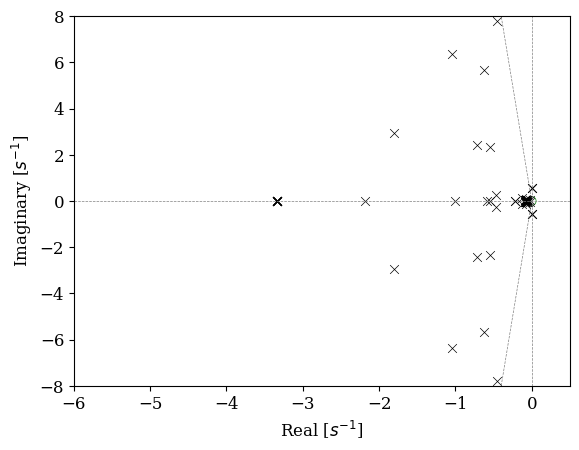

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [602]:
ssa.EIG.plot()

In [603]:
eig     = ssa.EIG.calc_eig()
eig_max = np.max(eig[0].real)

In [604]:
# Turn off stability check in TDS
ssa.TDS.config.criteria = 0

# Turn off simulation progress bar
ssa.TDS.config.no_tqdm = 1

# Simulation time
ssa.TDS.config.tf = 12

ssa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-12 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Toggle Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=1.0 sec.


Simulation to t=12.00 sec completed in 1.9475 seconds.


True

# Plot

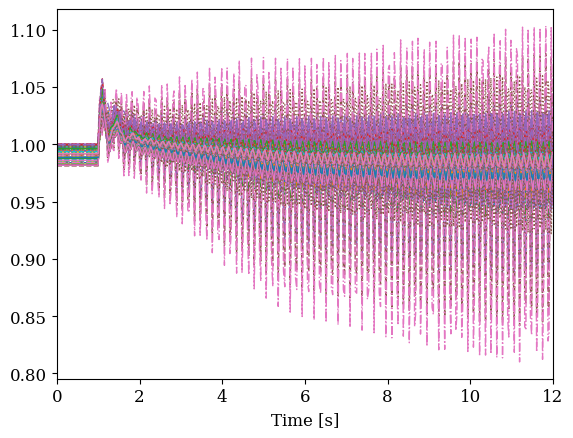

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [605]:
ssa.TDS.plt.plot(
                ssa.Bus.v,
                )

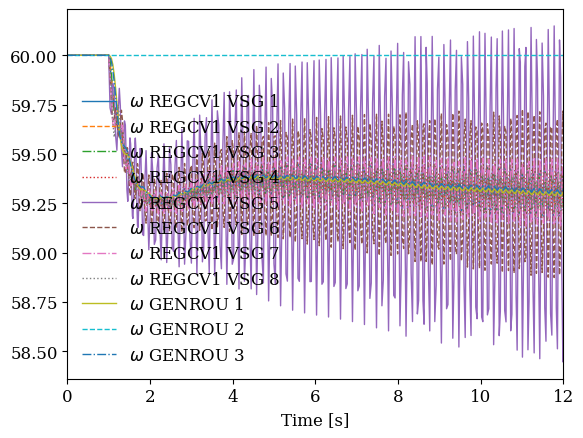

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [606]:
ssa.TDS.plt.plot(
                [ssa.REGCV1.omega, ssa.GENROU.omega],
                ytimes = 60,
                legend = True
                )
                

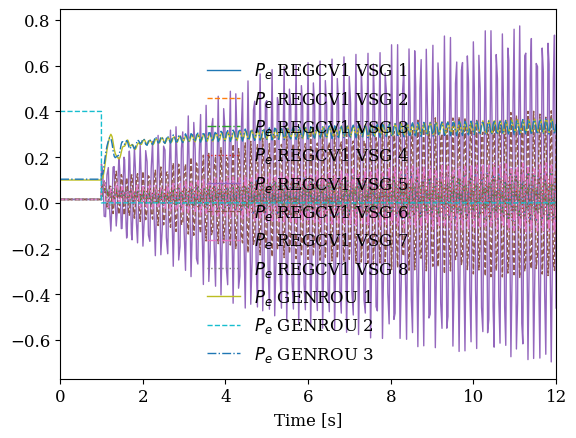

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [607]:
ssa.TDS.plt.plot(
                [ssa.REGCV1.Pe, ssa.GENROU.Pe],
                # left = 0.5,
                # right = 5,
                legend = True
                )

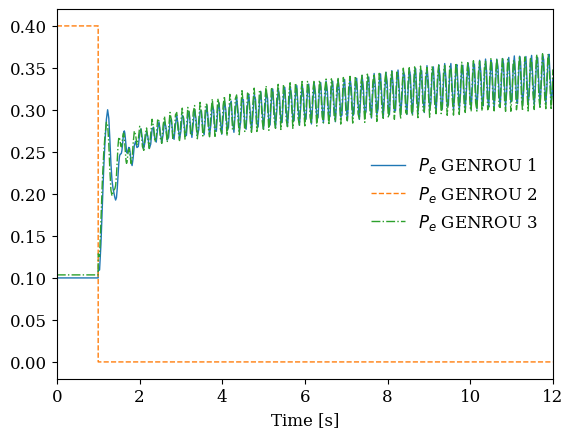

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [608]:
ssa.TDS.plt.plot(
                ssa.GENROU.Pe,
                # left = 0.5,
                # right = 5,
                )

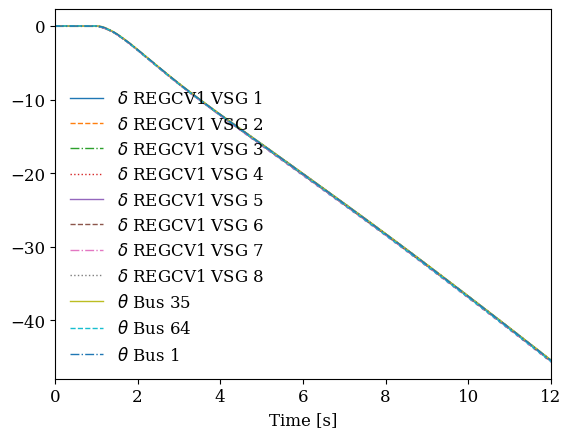

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [609]:
# Power angle
ssa.TDS.plt.plot(
                [ssa.REGCV1.delta, ssa.GENROU.a],   # GENROW angel is bus angle
                legend = True
                )

## Extract data

Code clariffication for extracting simulation data after TDS:

ssa.dae.ts.y:  extract **algebra** variable

ssa.dae.ts.x:  extract **state** variable

....a, .a means the idx of the target variable

CHECK https://docs.andes.app/en/latest/groupdoc/SynGen.html#genrou for model reference


In [610]:
# Extract time
t = ssa.dae.ts.t
t = t[:, np.newaxis]

# Extract RoCoF
rocof     = ssa.dae.ts.y[:,  ssa.BusROCOF.Wf_y.a]
rocof_sg  = rocof[:, [0,1,2]]
rocof_ibr = rocof[:, [3,4,5,6,7,8,9,10]]
rocof_max = np.max(np.abs(rocof*60))

# Extract frequency
f         = ssa.dae.ts.x[:,  ssa.GENROU.omega.a]
fnadir    = np.min(f)*60 - 60

# Extract voltage
busV      = ssa.dae.ts.y[:,  ssa.Bus.v.a]
busV_min  = np.min(busV)

# Extract power angle
theta           = ssa.dae.ts.y[:, ssa.GENROU.a.a]
delta_theta     = np.max(theta, axis=1) - np.min(theta, axis=1)
delta_theta_max = np.max(delta_theta)

In [611]:
print('Maximum RoCoF: ', rocof_max, 'Hz/s')
print('Frequency nadir: ', fnadir, 'Hz')
print('Maximum angle difference: ', delta_theta_max, 'rad')
print('Minimum voltage: ', busV_min, 'pu')
print('Maximum eigenvalue: ', eig_max)

Maximum RoCoF:  0.7079191912364027 Hz/s
Frequency nadir:  -0.7283458725452903 Hz
Maximum angle difference:  0.24056733190946744 rad
Minimum voltage:  0.8100768509434446 pu
Maximum eigenvalue:  4.333135461471103e-12


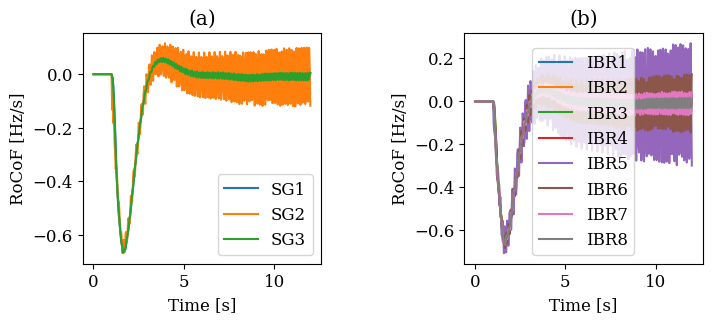

In [612]:
fig = plt.figure(figsize=(8, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.6, hspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ibr_legend = ['IBR1','IBR2','IBR3','IBR4','IBR5','IBR6','IBR7','IBR8']
sg_legend = ['SG1', 'SG2', 'SG3']

ax1.plot(
            t,
            rocof_sg * 60,
        )
ax1.set_title('(a)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('RoCoF [Hz/s]')
ax1.legend(sg_legend)
# ax1.set_ylim([0.95, 1.12])
# ax1.set_xlim([0, 3600])

ax2.plot(
            t,
            rocof_ibr * 60,
        )
ax2.set_title('(b)')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('RoCoF [Hz/s]')
ax2.legend(ibr_legend)

# Extract data after a specific time

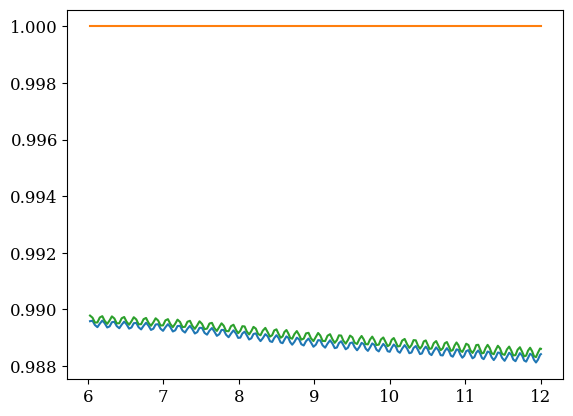

In [613]:
idx_t6 = np.min(np.where(t>6)[0])                      # find the idx of time t > 6
f_t6   = ssa.dae.ts.x[idx_t6:,  ssa.GENROU.omega.a]    # extract the frequency after t = 6

plt.plot(t[idx_t6:], f_t6)                             # plot the frequency after t = 6